In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train_image_data = pd.read_csv('features.csv')
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = train_image_data.iloc[:, 1:-1]#except the last and the first(Id)
y = train_image_data['Pawpularity']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


linear model

Selected Features: Index(['haralick_0', 'haralick_1', 'haralick_3', 'haralick_4', 'haralick_6',
       'haralick_9', 'haralick_11', 'haralick_12', 'hog_95', 'hog_49',
       'hog_27', 'hog_88', 'hog_103', 'hog_100', 'hog_90', 'hog_50', 'hog_36',
       'hog_92'],
      dtype='object')
Coefficients: [-2.51226556e-01  7.52588082e+07 -3.01035233e+08 -2.59092551e-01
  7.52588082e+07  9.32827769e+01 -2.48738242e-01  6.04570866e-01
 -4.74689285e-02 -5.38277672e-02  8.85182602e-02 -5.07191351e-02
 -4.27157747e-02  4.94935261e-02  7.64053471e-02 -5.97752137e-02
 -3.88701102e-02 -6.67685054e-02]
Mean squared error: 0.20966
Coefficient of determination: 0.00558


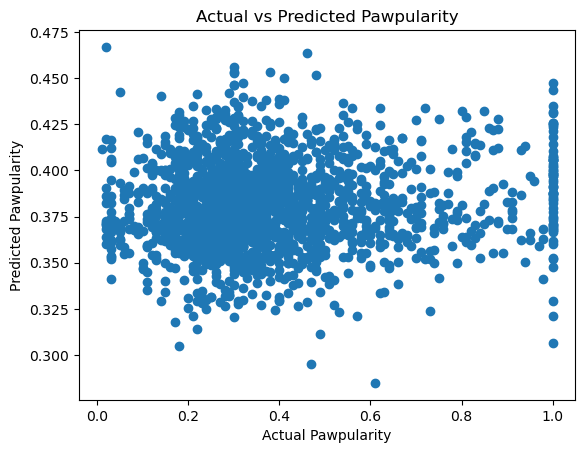

In [22]:
from sklearn.feature_selection import RFE

# Train the model
model = LinearRegression()
rfe=RFE(model,n_features_to_select=18)
x_rfe=rfe.fit_transform(X_train,y_train)
#get the selected features
selected_features = X.columns[rfe.support_]
model.fit(X_train[selected_features], y_train)
# Make predictions
y_pred = model.predict(X_val[selected_features])

# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


svr

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create SVR model
svr_model = SVR()

# Create StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear']}

# Perform grid search on scaled data
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   4.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   4.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   3.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   4.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   3.7s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.013 total time=   4.7s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.003 total time=   4.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.002 total time=   4.7s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.017 total time=   4.6s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.022 total time=   4.8s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.024 total time=   2.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;,

In [20]:
best_params, best_estimator

({'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, SVR(C=0.1, gamma=1))

In [21]:
# Make predictions
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Mean squared error: %.7f' % mean_squared_error(y_val, y_pred))
print('Coefficient of determination: %.7f' % r2_score(y_val, y_pred))



c:\Users\Leonor Moura\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Mean squared error: 0.0442529
Coefficient of determination: -0.0011166


decison tree grid

In [12]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.017 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.017 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

({'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=10))

In [17]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Mean squared error: %.5f' % mean_squared_error(y_val, y_pred))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

Mean squared error: 0.04417
Coefficient of determination: 0.00072
